In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
risk_scores = model.predict(X_test)
binary_labels = np.where(risk_scores >= 0.5, 1, 0)

#Calculating Accuracy, Confusion Matrix, Precision, Recall, and F1-score:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Actual outcomes
actual_outcomes = y_test

# Calculate accuracy
accuracy = accuracy_score(actual_outcomes, binary_labels)
print(f'Accuracy: {accuracy:.3f}')

# Calculate confusion matrix
conf_mat = confusion_matrix(actual_outcomes, binary_labels)
print('Confusion Matrix:')
print(conf_mat)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_outcomes, binary_labels)
recall = recall_score(actual_outcomes, binary_labels)
f1 = f1_score(actual_outcomes, binary_labels)
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')



Accuracy: 0.760
Confusion Matrix:
[[80 19]
 [18 37]]
Precision: 0.661
Recall: 0.673
F1-score: 0.667


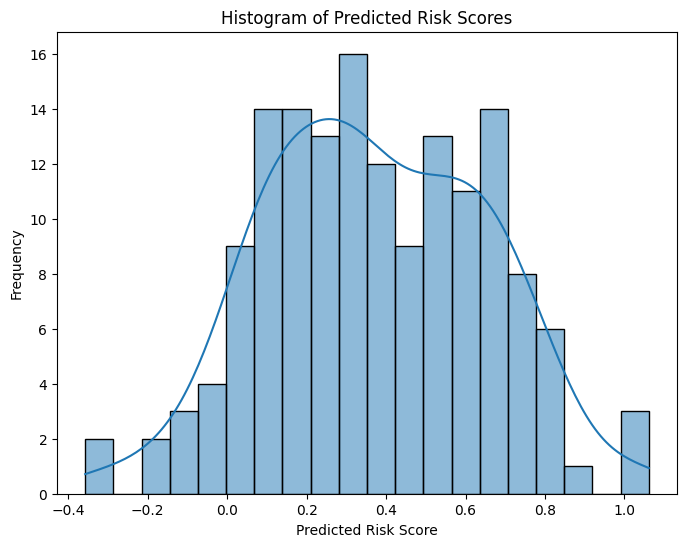

In [ ]:
# Visualizing Predicted Risk Scores:
plt.figure(figsize=(8, 6))
sns.histplot(risk_scores, bins=20, kde=True)
plt.xlabel('Predicted Risk Score')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Risk Scores')
plt.show()

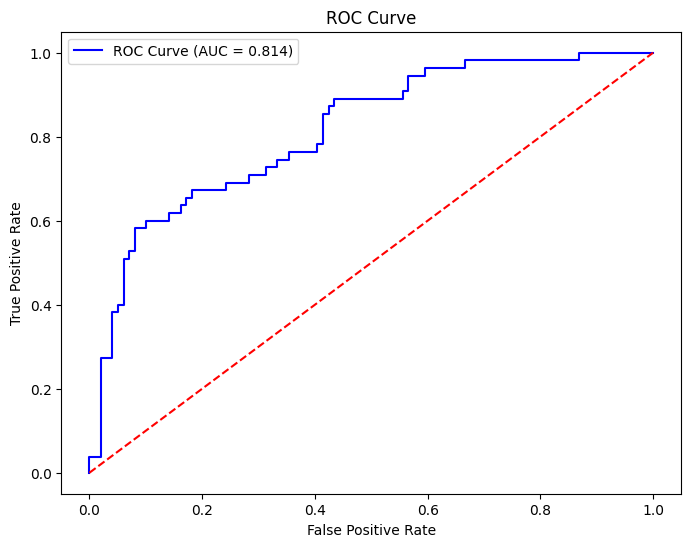

In [25]:
from sklearn.metrics import roc_curve, auc

actual_outcomes = y_test

# Use risk_scores as predicted probabilities for ROC curve
predicted_probabilities = risk_scores

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_outcomes, predicted_probabilities)

# Calculate AUC
auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()